<a href="https://colab.research.google.com/github/Msaleemakhtar/Deep-Learning-with-pytorch/blob/main/01_pyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning with Pytorch**

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# check pytorch version
torch.__version__

'2.2.1+cu121'

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
# split data for training and testing the model

train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
# plotting training and testing data for visualization
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):

  plt.figure(figsize=(8, 4))
  plt.scatter(train_data, train_labels, c="b", s=4, label= "Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")


  if predictions is not None:
    plt.scatter(test_data, predictions, c= "r", s= 4, label = "Predictions")

  plt.legend(prop ={"size":14})

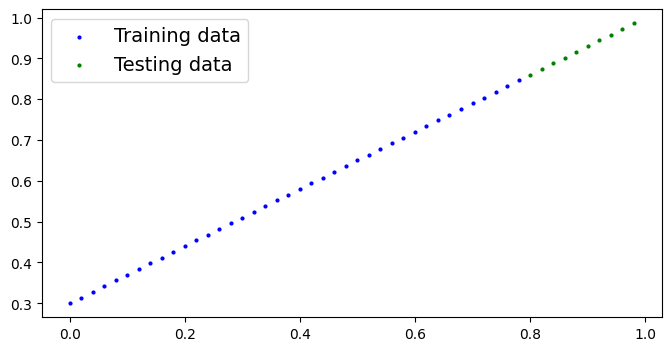

In [6]:

plot_predictions()

In [7]:
from torch import nn

class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()

    self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype= torch.float), requires_grad=True)


  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.weight * x + self.bias




In [8]:
torch.manual_seed(42)
model_0 = LinearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:

model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [11]:
y_test-X_test

tensor([[0.0600],
        [0.0540],
        [0.0480],
        [0.0420],
        [0.0360],
        [0.0300],
        [0.0240],
        [0.0180],
        [0.0120],
        [0.0060]])

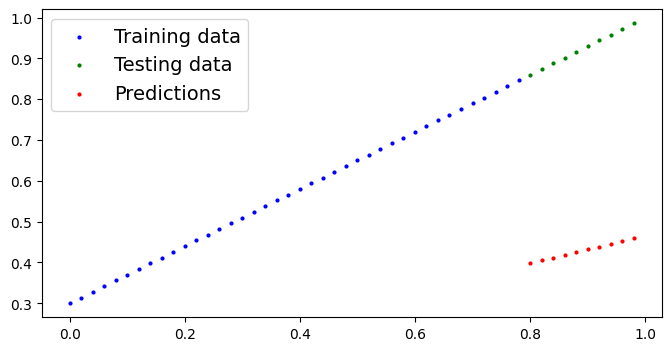

In [12]:
plot_predictions(predictions=y_pred)

In [13]:
# create the loss function
loss_fn = nn.L1Loss()

# create the optimizer
optimizor = torch.optim.SGD(params=model_0.parameters(), lr=.01)

In [14]:
# Model Training
epochs =100
# track the value
epoch_count = []
loss_value = []
test_loss_value = []
for epoch in range(epochs):
  # put the model in training mode
  model_0.train()

  # forward propogation for prediction
  y_pred = model_0(X_train)

  #calculate the loss
  loss = loss_fn(y_pred, y_train)


  # zero grad of the optimizor
  optimizor.zero_grad()

  # Back propogation
  loss.backward()

  # progress the optimizor
  optimizor.step()

  ## testing
  # put modal in evaluation
  model_0.eval()
  with torch.inference_mode():
  # test the modal
    test_pred = model_0(X_test)

  # calculate the test loss
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 20 == 0:
      epoch_count.append(epoch)
      loss_value.append(loss.detach().numpy())
      test_loss_value.append(test_loss.detach().numpy())
      print(f"epoch : {epoch} | loss ; {loss} | test_loss : {test_loss}")


epoch : 0 | loss ; 0.31288138031959534 | test_loss : 0.48106518387794495
epoch : 20 | loss ; 0.08908725529909134 | test_loss : 0.21729660034179688
epoch : 40 | loss ; 0.04543796554207802 | test_loss : 0.11360953003168106
epoch : 60 | loss ; 0.03818932920694351 | test_loss : 0.08886633068323135
epoch : 80 | loss ; 0.03132382780313492 | test_loss : 0.07232122868299484


In [15]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [16]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

y_pred_new

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

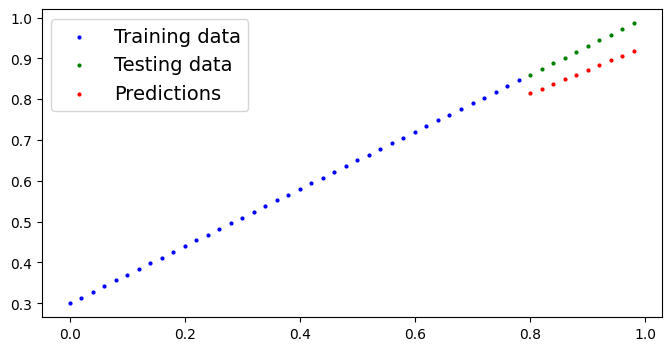

In [17]:
plot_predictions(predictions=y_pred_new)

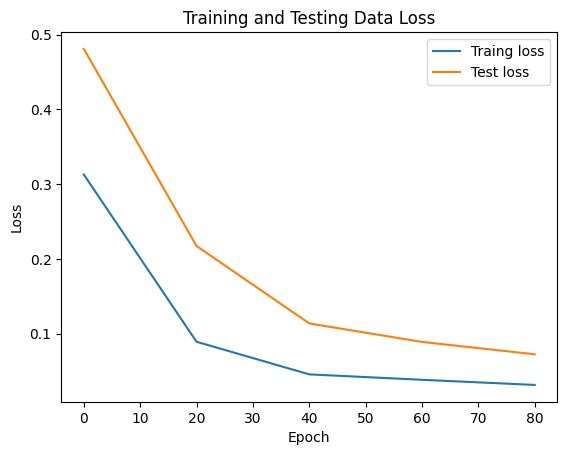

In [18]:
plt.plot(epoch_count, loss_value, label= "Traing loss")
plt.plot(epoch_count, test_loss_value, label= "Test loss")
plt.title("Training and Testing Data Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [19]:
# saving the model

from pathlib import Path

# create modal directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create save path
MODEL_NAME = "01_pytorch_work_flow.pth"
MODEL_SAVE_PATH =MODEL_PATH/MODEL_NAME

# save the model
print(f"Saving Model to the path : {MODEL_SAVE_PATH}")
torch.save(obj= model_0.state_dict(), f = MODEL_SAVE_PATH)



Saving Model to the path : Models/01_pytorch_work_flow.pth
